# Chap 17 - Ex3: Apply LLE for binary.csv data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)
pd.set_option('display.width', 1000)

In [2]:
admit = pd.read_csv('Data/binary.csv')

admit

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [3]:
admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


Number of numerical fields: 3

All numerical fields: Index(['gre', 'gpa', 'rank'], dtype='object')



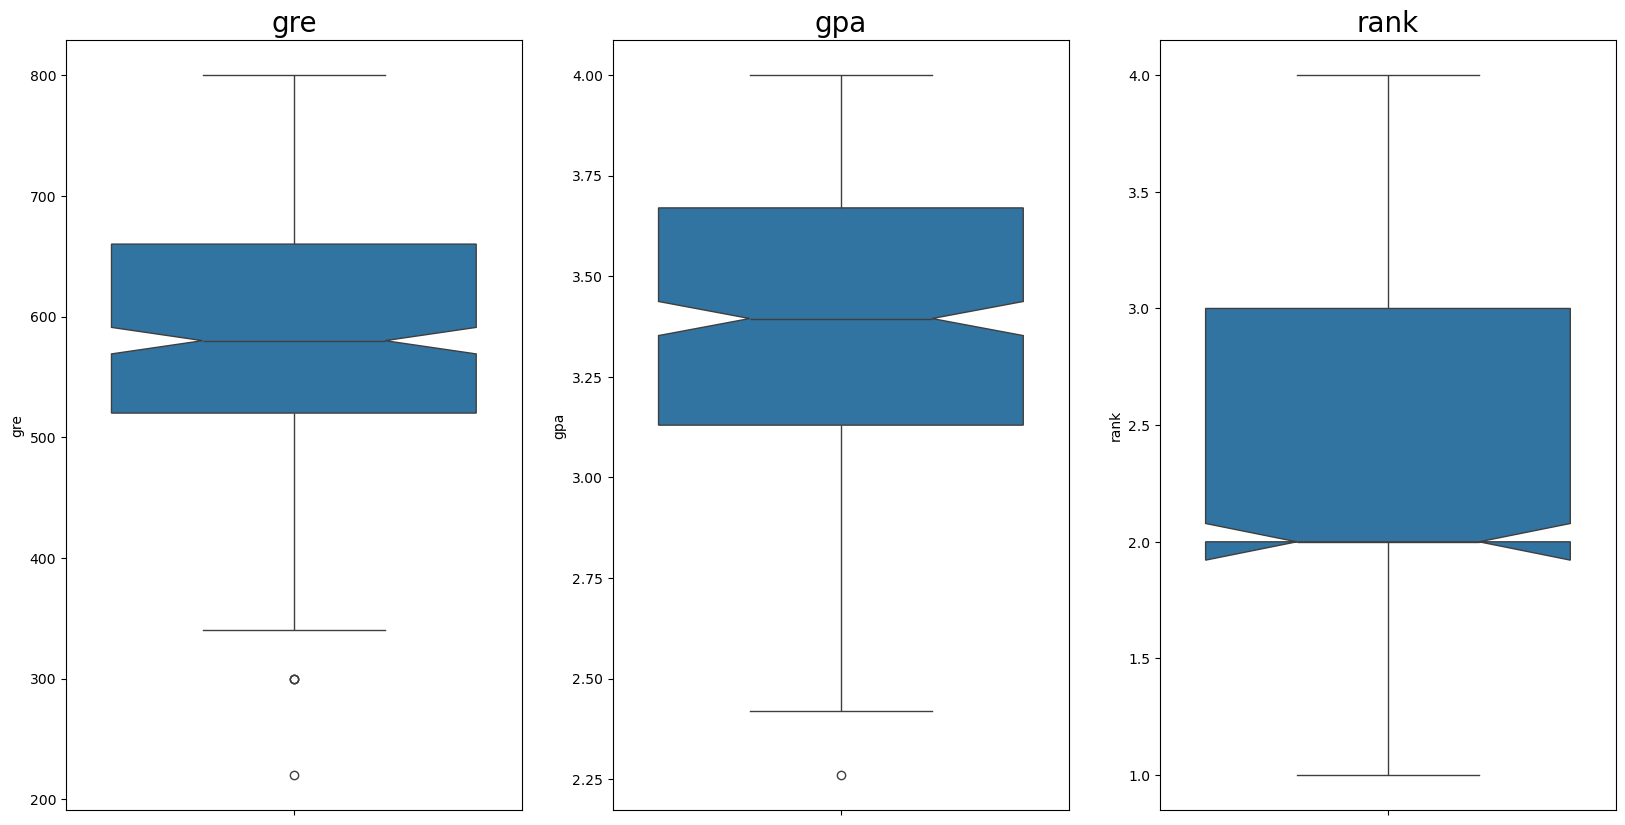

In [5]:
## Visualize numerical variables

numeric_cols = admit.columns[1:]

col = 3
row = (len(numeric_cols)//col) if ( (len(numeric_cols)%col) == 0) else ((len(numeric_cols)//col) + 1)

print(f'Number of numerical fields: {len(numeric_cols)}\n')
print(f'All numerical fields: {numeric_cols}\n')

plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
for i in range(1, len(numeric_cols)+1):
    try:
        plt.subplot(row, col, i)
        sbn.boxplot(data = admit, y = numeric_cols[i-1], notch = True)
        plt.title(numeric_cols[i-1], size = 20)
    except Exception:
        print('Error {}'.format(numeric_cols[i-1]))
        break
plt.show()

## <span style = 'color:yellow'> Outliers are not too extreme, can use MinMaxScaler
## <span style = 'color:yellow'> Run many times with different n_neighbors

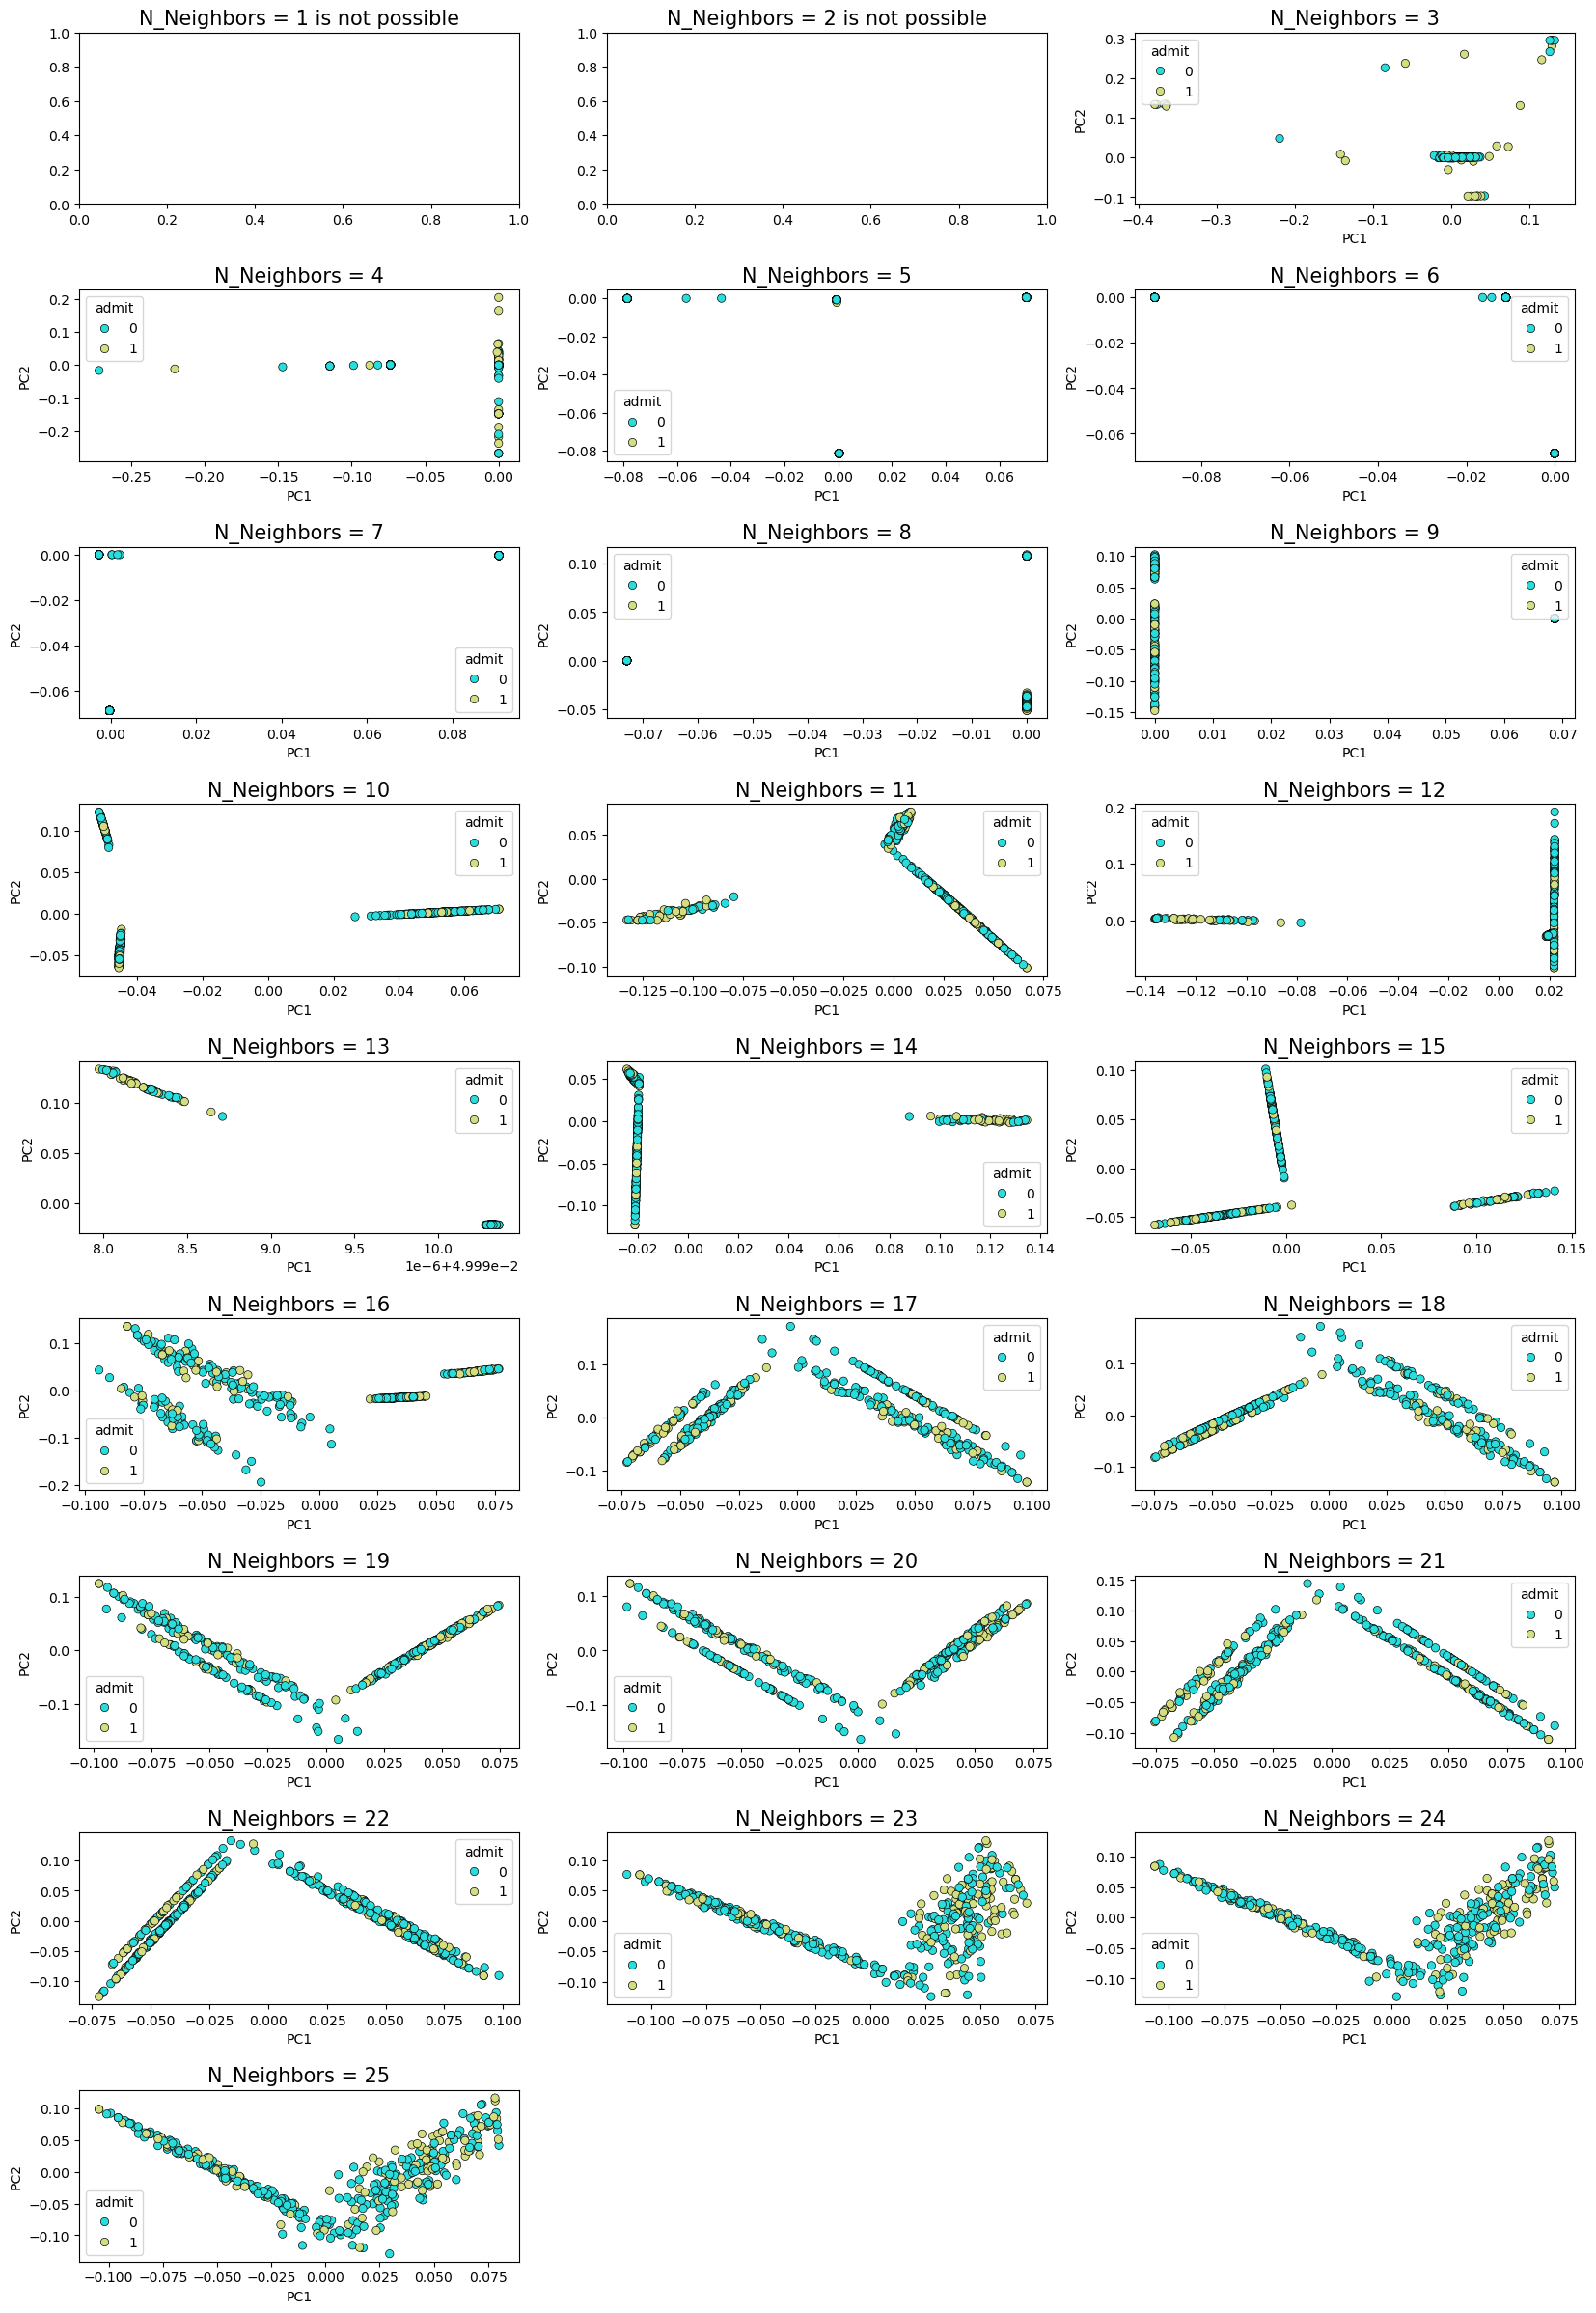

In [17]:
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.manifold import LocallyLinearEmbedding
from imblearn.pipeline import Pipeline

neighbor_lst = list(range(1, 26))
col = 3
row = (len(neighbor_lst)//col) if ( (len(neighbor_lst)%col) == 0) else ((len(neighbor_lst)//col) + 1)

plt.figure(figsize=(20,30))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i in range(len(neighbor_lst)):
    lle_pipe = Pipeline([
        ('MinMaxScaler', MinMaxScaler()),
        ('LLE', LocallyLinearEmbedding(n_neighbors=neighbor_lst[i], n_components=2, random_state=1))
    ])

    try:
        lle_pipe.fit(admit.drop('admit', axis = 1))
    except Exception:
        plt.subplot(row, col, i+1)
        plt.title(f'N_Neighbors = {neighbor_lst[i]} is not possible', size = 15)
        continue
    
    #Create LLE reduced dataframe
    admit_lle = pd.DataFrame(
        lle_pipe.transform(admit.drop('admit', axis = 1)),
        columns = [f'PC{j+1}' for j in range(lle_pipe.named_steps['LLE'].n_components)]
    )    

    plt.subplot(row, col, i+1)
    sbn.scatterplot(data = admit_lle, x = 'PC1', y = 'PC2', edgecolors = 'black', hue = admit['admit'], palette = 'rainbow')
    plt.title(f'N_Neighbors = {neighbor_lst[i]}', size = 15)

plt.show()